# Logistic Regression

You are provided with a dataset available in the Google Drive folder at the following link:
https://drive.google.com/drive/folders/1NB2zIk679jlZC1x0gZPS4ugfHIO1aq1p

The dataset contains information related to social network advertisements, including user attributes such as age and estimated salary, along with a binary target variable indicating whether a user purchased the advertised product or not.

The goal is to build a Logistic Regression classification model to predict whether a user will purchase the advertised product based on their Age and Estimated Salary.

Perform the following tasks:

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [2]:
dat = pd.read_csv('Social_Network_Ads.csv')
dat.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Select Features and Target Variable



In [3]:
X = dat[["Age", "EstimatedSalary"]]
y = dat['Purchased']

## Splitting the dataset into the Training set and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state= 42)

## Feature Scaling

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [6]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Predicting the Test set results

In [7]:
y_pred = model.predict(X_test)

## Making the Confusion Matrix

In [8]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)

Confusion matrix:
 [[61  2]
 [12 25]]


## Visualising the Training set results

In [12]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01) )

/tmp/ipython-input-2868958758.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


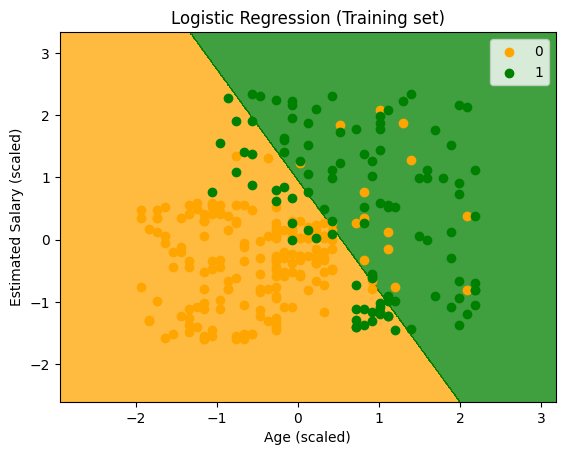

In [15]:
plt.contourf(X1, X2,
    model.predict(
        np.array([X1.ravel(), X2.ravel()]).T
    ).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(('orange', 'green'))(i),
        label=j
    )

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()


## Visualising the Test set results

In [11]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

/tmp/ipython-input-382147801.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


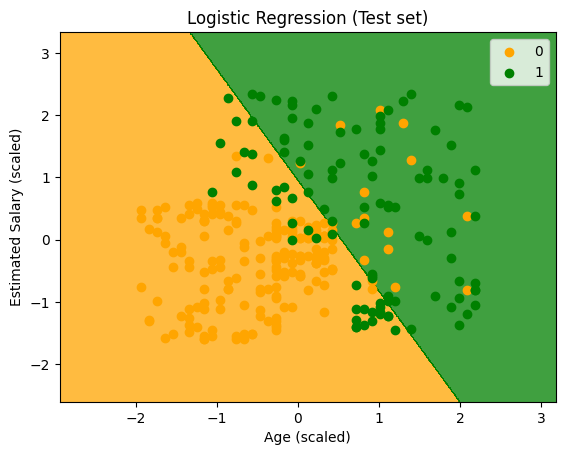

In [16]:
plt.contourf(X1, X2,
    model.predict(
        np.array([X1.ravel(), X2.ravel()]).T
    ).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(('orange', 'green'))(i),
        label=j
    )

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.legend()
plt.show()
